# COMP 484 - Practical Assignment 6

### Ramraj Chimouriya
### CE IV/I

---

## Book -  Artificial Intelligence with Python
## Chapter 14 - Artificial Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

%matplotlib inline

### Building a Perceptron based classifier

In [2]:
# Load input data
text = np.loadtxt("./data/data_perceptron.txt")

# Separate the text into datapoints and labels.
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

Text(0.5, 1.0, 'Input data')

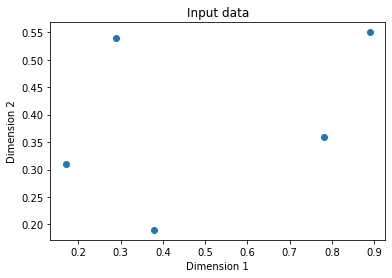

In [3]:
# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [4]:
# define the max and min values that each dimension can take
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

# numbers of neurons in the output layer
num_output = labels.shape[1]

# Define a perceptron with 2 input neurons since we have 2 dimensions in the input data
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [5]:
#  Train the perceptron with the training data
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)

The goal of learning is reached


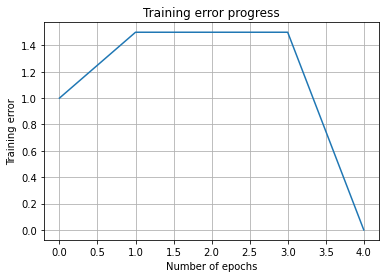

In [6]:
# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

### Construting a single layer neural network

Lets create a single neural network that consists of independent neurons acting on input data to produce the output.

In [7]:
# Load input data
text = np.loadtxt('./data/data_simple_nn.txt')

# Separate it into datapoints and labels
data = text[:, 0:2]
labels = text[:, 2:]

Text(0.5, 1.0, 'Input data')

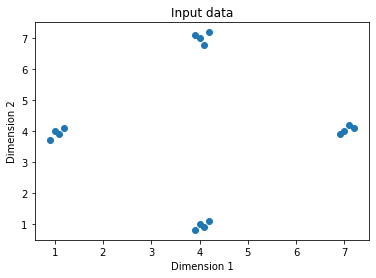

In [8]:
# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

Extract the minimum and maximum values for each dimension.

In [9]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [10]:
# define the number of neurons in the output layer
num_output = labels.shape[1]

In [11]:
# define a single-layer neuron network
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [12]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


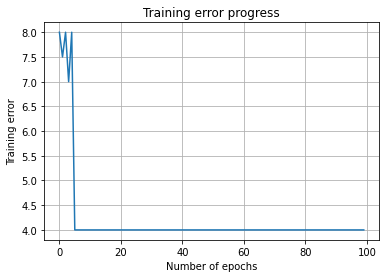

In [13]:
# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

Let's run the classifier in the test data points

In [14]:
print('Test results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])

Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


### Constructing a multilayer neural network

In this section, we will use a multilayer neural network as a regressor.

First of, let's generate some datapoints based on the equation `y = 3x^2 + 5`.

In [15]:
# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

Reshape the above data to create some training dataset

In [16]:
# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

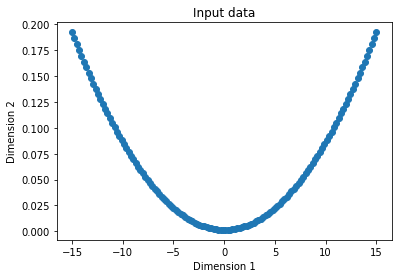

In [17]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

Define a multilayer neural network with two hidden layers.

In [18]:
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [19]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [20]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.07876457084276317;
Epoch: 200; Error: 0.07005299965825315;
Epoch: 300; Error: 0.06423625989528345;
Epoch: 400; Error: 0.10257016640958085;
Epoch: 500; Error: 0.15910719690727032;
Epoch: 600; Error: 0.058227264343259255;
Epoch: 700; Error: 0.016310420869387415;
Epoch: 800; Error: 0.02360423254184793;
Epoch: 900; Error: 0.07244626581776184;
Epoch: 1000; Error: 0.03561140764222249;
Epoch: 1100; Error: 0.01814310634298307;
The goal of learning is reached


In [21]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

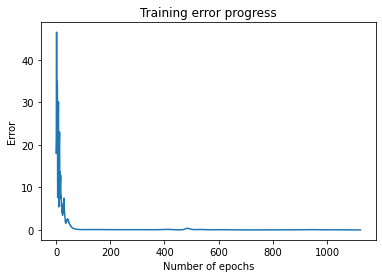

In [22]:
# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

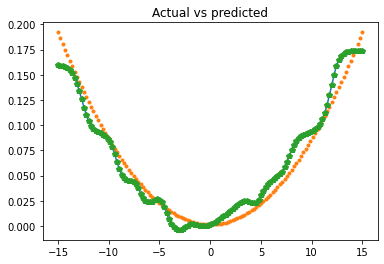

In [23]:
# Plot the output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()

### Building a vector quantizer

Using artificial neural networks to build a vector quantizer.  

In [24]:
# Load input data
text = np.loadtxt('./data/data_vector_quantization.txt')

# Separate it into data and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [25]:
# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

# Train the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [26]:
# Create the input grid
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

# Evaluate the input grid of points
grid_eval = nn.sim(grid_xy)

# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

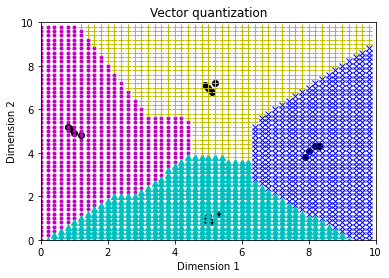

In [27]:
# Plot the outputs
plt.plot(class_1[:,0], class_1[:,1], 'ko',
        class_2[:,0], class_2[:,1], 'ko',
        class_3[:,0], class_3[:,1], 'ko',
        class_4[:,0], class_4[:,1], 'ko')

plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^',
        grid_4[:,0], grid_4[:,1], 'y+')

plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')
plt.show()

### Analyzing sequential data using recurrent neural networks

RNNs are great at modeling sequential data.

Lets define a function to generate the waveforms.

In [28]:
def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
    # Create varying amplitudes
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
    return wave, amp

Define a function to visualize the output of the neural network

In [29]:
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

In [30]:
# Create some sample data
num_points = 40
wave, amp = get_data(num_points)

# Create a recurrent neural network with 2 layers
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), 
                                        nl.trans.PureLin()])

# Set the init functions for each layer
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

# Train the recurrent neural network
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

# Run the training data through the network
output = nn.sim(wave)

Epoch: 100; Error: 0.8080497136964115;
Epoch: 200; Error: 0.6396395480896141;
Epoch: 300; Error: 0.1636213869565243;
Epoch: 400; Error: 0.0766137794186018;
Epoch: 500; Error: 0.0654402487432033;
Epoch: 600; Error: 0.060531481746217766;
Epoch: 700; Error: 0.0687308402039559;
Epoch: 800; Error: 0.06000973314764067;
Epoch: 900; Error: 0.05935887140220928;
Epoch: 1000; Error: 0.05368222215174103;
Epoch: 1100; Error: 0.0499335730968952;
Epoch: 1200; Error: 0.04891507434220615;
The maximum number of train epochs is reached


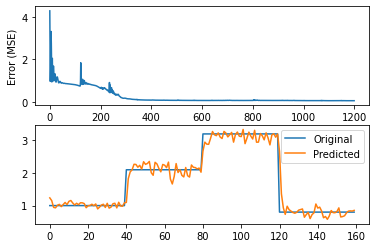

In [31]:
# Plot the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')
plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

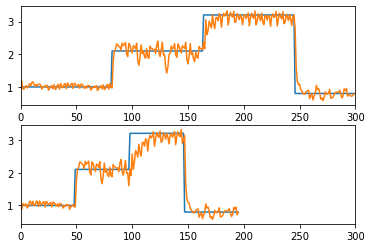

In [32]:
# Testing the network performance on unknown data
plt.figure()
plt.subplot(211)
visualize_output(nn, 82) 
plt.xlim([0, 300])
plt.subplot(212)
visualize_output(nn,49)
plt.xlim([0, 300])
plt.show()

### Visualizing characters in an Optical Character Recognition database

In [33]:
import os
import sys

import cv2

In [34]:
# Define the input file
input_file = './data/letter.data'

In [35]:
# Define the visualization parameters
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [36]:
# Iterate until the user presses the Esc key
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Read the data
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])
        
        # Reshape the data into a 2D image
        img = np.reshape(data, (height, width))
        
        # Scale the image
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)
        
        # Display the image
        cv2.imshow('Image', img_scaled)
        
        # Check if the user pressed the Esc key
        c = cv2.waitKey()
        if c == 27:
            break

### Building on Optical Character Recognition engine

In [38]:
# Define the input file
input_file = './data/letter.data'

In [39]:
# Define the number of datapoints to
# be loaded from the input file
num_datapoints = 50

In [40]:
# String containing all the distinct characters
orig_labels = 'omandig'

In [41]:
# Compute the number of distinct characters
num_orig_labels = len(orig_labels)

In [42]:
# Define the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

In [43]:
# Define the dataset extraction parameters
start = 6
end = -1

In [47]:
# Creating the dataset
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')
        
        # Check if the label is in our ground truth
        # labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue
        
        # Extract the current label and append it
        # to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)
        
        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)
        
        # Exit the loop once the required dataset has been created
        if len(data) >= num_datapoints:
            break

In [48]:
# Convert the data and labels to numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

In [49]:
# Extract the number of dimensions
num_dims = len(data[0])

In [50]:
# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], [128, 16, num_orig_labels])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [51]:
# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=0.01)

Epoch: 100; Error: 106.11436478661255;
Epoch: 200; Error: 53.782868855771476;
Epoch: 300; Error: 53.939123670605;
Epoch: 400; Error: 36.90395738935559;
Epoch: 500; Error: 38.04794751838028;
Epoch: 600; Error: 27.804187974890663;
Epoch: 700; Error: 17.782271812994622;
Epoch: 800; Error: 15.091041738817003;
Epoch: 900; Error: 17.607371243223795;
Epoch: 1000; Error: 17.40322669925471;
Epoch: 1100; Error: 17.735690532563467;
Epoch: 1200; Error: 17.54846613824259;
Epoch: 1300; Error: 17.436170570911823;
Epoch: 1400; Error: 17.234583807016563;
Epoch: 1500; Error: 17.54084158470881;
Epoch: 1600; Error: 17.247925955489592;
Epoch: 1700; Error: 16.382861563228204;
Epoch: 1800; Error: 18.80712362407413;
Epoch: 1900; Error: 17.73351476787517;
Epoch: 2000; Error: 18.225875790934243;
Epoch: 2100; Error: 17.533048606756502;
Epoch: 2200; Error: 17.50832423045442;
Epoch: 2300; Error: 17.60325903392299;
Epoch: 2400; Error: 17.167070200705552;
Epoch: 2500; Error: 17.48311642405757;
Epoch: 2600; Error: 17

In [52]:
# Predict the output for test inputs
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: n

Original: a
Predicted: o

Original: n
Predicted: n
